# Final Report: Exploring How Corona Relate to Happiness Factors Worldwide

The question that interests us is: "Does the Impact of COVID-19 on Global Death Rates Relate to Varied Levels of Happiness Across Countries?"

## 1. Introduction


### 1.1 overview

This project looks at how COVID-19 deaths might be connected to things that make people happy. We're checking if there's a link between how many people passed away due to COVID-19 in different countries and factors that contribute to happiness, like how much money people have, how healthy they are, how much support they get, how free they feel, how generous people are, and how they see corruption. We'll use numbers and math to see if there's a connection between this sad event and what makes people feel good. The aim is to understand if there's any relationship between tough times and how happy people feel around the world.

### 1.2 datasets in details


### Datasource1: World Happiness Report up to 2022
* Metadata URL: https://www.kaggle.com/datasets/mathurinache/world-happiness-report
* Data URLs: can be download via Kaggle API - only 2020 data is used in this project
* Data Type: CSV

The Happiness Score is a national average of the responses to the main life evaluation question asked in the Gallup World Poll (GWP), which uses the Cantril Ladder.

The Happiness Score is explained by the following factors:

GDP per capita

Healthy Life Expectancy

Social support

Freedom to make life choices

Generosity

Corruption Perception

Residual error


This dataset was offered under licence Public Domain. for more information: https://creativecommons.org/publicdomain/zero/1.0/

### Datasource2: Novel Coronavirus (COVID-19) Cases Data
* Metadata URL: https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases?
* Data URL: https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv
* Data Type: CSV

Johns Hopkins tracked three years of COVID-19 data from around the world. This data was collected from 1/22/20 to 3/10/23 on cases, deaths, vaccines, testing and demographics.

Fields available in the data include Province/State, Country/Region, Last Update, Confirmed, Suspected, Recovered, Deaths

This dataset was offered under licence  Open Data Foundation. for more information: https://opendatacommons.org/


## 2. Methods

### 2.1 Installing dependencies

Initially, install required dependencies. 
The specific version of SQLAlchemy is needed because SQLAlchemy 2.0 does not work with pandas yet. 

nbformat allows the use of the "notebook" formatter for the plot, others can not be rendered to HTML.

Kaggle is used to get data from kaggle datasets

Seaborn is a Python data visualization library built on top of Matplotlib. It's specifically designed for statistical plotting and works well with pandas data structures.

Required packages' versions are :

pandas 1.5.3

SQLAlchemy 1.4.46

kaggle 1.5.16

In [1]:
%pip install nbformat
%pip install pandas
%pip install SQLAlchemy
%pip install kaggle
%pip install seaborn
%pip install matplotlib
%pip install plotly

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


### 2.2 Importing modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

print("All modules imported!")

All modules imported!


### 2.3 Load data

There is another procedure for exploring data and datasets we had. called data_exploration.ipynb. in that one we go step by step from loading data and cleaning/modification till we have a final dataset which is used here. 

In this part we only use the final data that I had to work on and create results and discuss on them.

if you want to know more about exploriring the datasets and having final version you can see it in : 

data-exploration-example.ipynb

In [3]:
# loading our final dataset to work on
df = pd.read_sql_table('final_table', 'sqlite:///final_dataset.sqlite')

# see 10 first rows to get familiar with it's structure
df.head(10)

,Country/Region,sum_for_each_country,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Afghanistan,129988469,South Asia,2.5669,0.031311,2.628270,2.505530,7.462861,0.470367,52.590000,...,-0.096429,0.933687,1.972317,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226,1.507236
1,Albania,185562654,Central and Eastern Europe,4.8827,0.056116,4.992687,4.772713,9.417931,0.671070,68.708138,...,-0.042309,0.896304,1.972317,0.906653,0.830484,0.846330,0.461946,0.171028,0.025361,1.640897
2,Algeria,182741650,Middle East and North Africa,5.0051,0.044236,5.091802,4.918397,9.537965,0.803385,65.905174,...,-0.121105,0.735485,1.972317,0.943856,1.143004,0.745419,0.083944,0.118915,0.129191,1.840812
3,Argentina,5625482921,Latin America and Caribbean,5.9747,0.053442,6.079446,5.869954,9.810955,0.900568,68.803802,...,-0.194914,0.842010,1.972317,1.028466,1.372544,0.849774,0.520840,0.070100,0.060415,2.072541
4,Armenia,285491323,Commonwealth of Independent States,4.6768,0.058595,4.791646,4.561953,9.100476,0.757479,66.750656,...,-0.138780,0.773545,1.972317,0.808262,1.034577,0.775857,0.378076,0.107226,0.104618,1.468162
5,Australia,3508864881,North America and ANZ,7.2228,0.041841,7.304808,7.140791,10.720596,0.944855,73.604538,...,0.190460,0.415169,1.972317,1.310396,1.477146,1.022608,0.621877,0.324974,0.335996,2.129804
6,Austria,2210457634,Western Europe,7.2942,0.033365,7.359596,7.228804,10.742824,0.928046,73.002502,...,0.085429,0.499955,1.972317,1.317286,1.437445,1.000934,0.603369,0.255510,0.281256,2.398446
7,Azerbaijan,493546661,Commonwealth of Independent States,5.1648,0.034197,5.231827,5.097774,9.687727,0.819308,65.508400,...,-0.240255,0.552538,1.972317,0.990273,1.180613,0.731134,0.467735,0.040113,0.247307,1.507633
8,Bahrain,357306683,Middle East and North Africa,6.2273,0.081882,6.387789,6.066811,10.676380,0.876342,68.500000,...,0.133729,0.739347,1.972317,1.296692,1.315324,0.838836,0.610400,0.287454,0.126697,1.751917
9,Bangladesh,1309367681,South Asia,4.8328,0.040124,4.911443,4.754157,8.287064,0.687293,64.503067,...,-0.033665,0.661844,1.972317,0.556156,0.868801,0.694941,0.604131,0.176745,0.176736,1.755262


### 2.3 Set up the Data and visualization

#### Map visualization

Map visualization can be incredibly useful for displaying geographical data. In our case, we can create a bubble map to visualize the number of COVID-19 deaths across different countries.

In [18]:
# Setting up dataset
data = df

# Plotting the bubble map
fig = px.scatter_geo(data, locations='Country/Region', locationmode='country names',
                     size='sum_for_each_country', color='sum_for_each_country',
                     hover_name='Country/Region',
                     projection='natural earth', title='Bubble Map of Sum by Country')
fig.show()

#### Calculating Correleation Matrix for the final Data

A correlation matrix is used to summarize data, specifically to understand the relationships between different variables in a dataset. It's a square matrix where the variables are displayed on both rows and columns, and each cell shows the correlation coefficient between the variables.

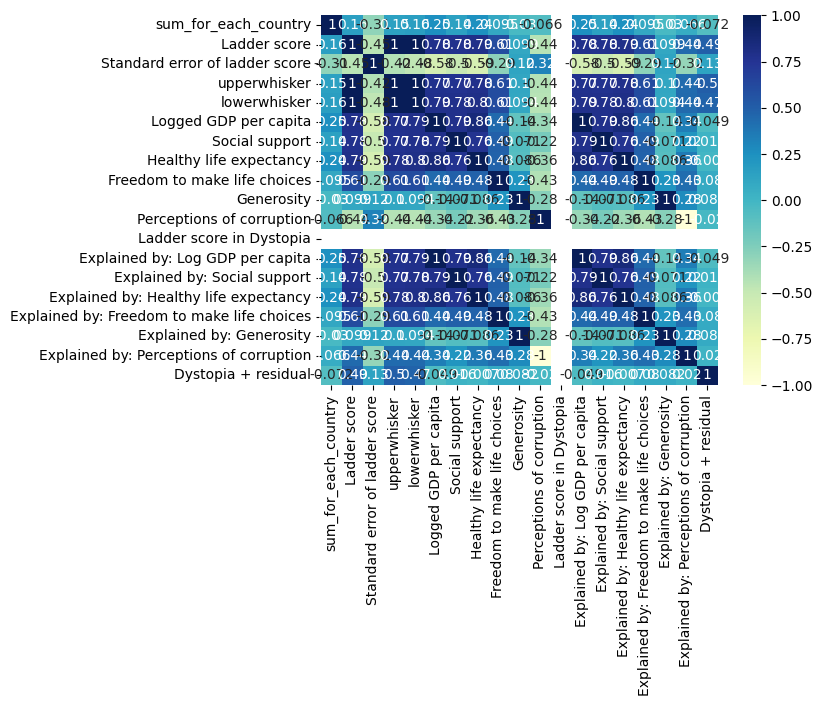

In [19]:

# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_df = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr_df, annot=True, cmap="YlGnBu")

# Show the plot
plt.show()

As shown above, the cells which are more close to blue, are the correlated factors which means that they have a stronger relationship

#### Scatter Plots

Scatter plots are excellent for visualizing the relationship between two continuous variables. In your case, you can create scatter plots to see how the number of deaths due to COVID-19 relates to each of the factors you've mentioned like GDP per capita, Healthy Life Expectancy, Social Support, Freedom to make life choices, Generosity, Corruption Perception, and Residual error. 

#### Plotting GDP vs Sum for deaths


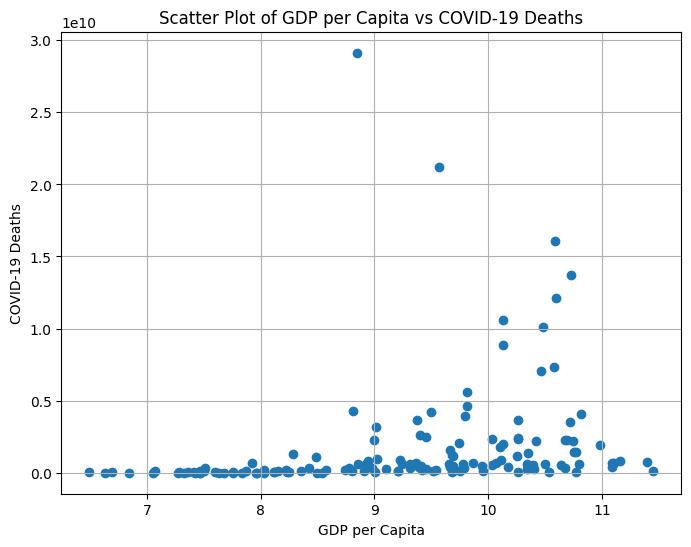

In [20]:

# plotting scatter plot in this matter
plt.figure(figsize=(8, 6))
plt.scatter(df['Logged GDP per capita'], df['sum_for_each_country'])
plt.title('Scatter Plot of GDP per Capita vs COVID-19 Deaths')
plt.xlabel('GDP per Capita')
plt.ylabel('COVID-19 Deaths')
plt.grid(True)
plt.show()


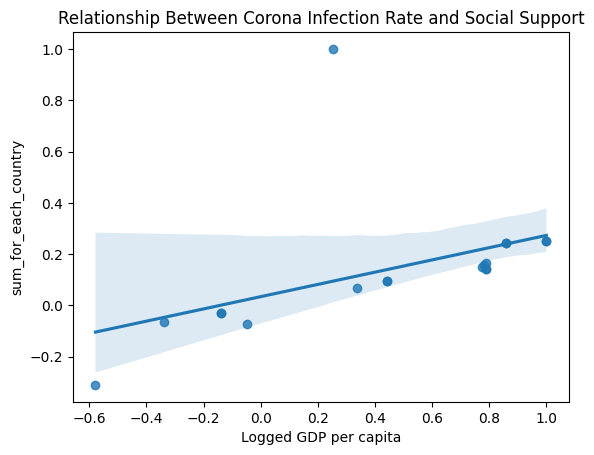

In [21]:

ax= sns.regplot(x="Logged GDP per capita", y="sum_for_each_country", data=corr_df)

ax.set_title("Relationship Between Corona Infection Rate and Social Support")

plt.show()

#### Plotting sum of deaths vs Health Life Expectancy

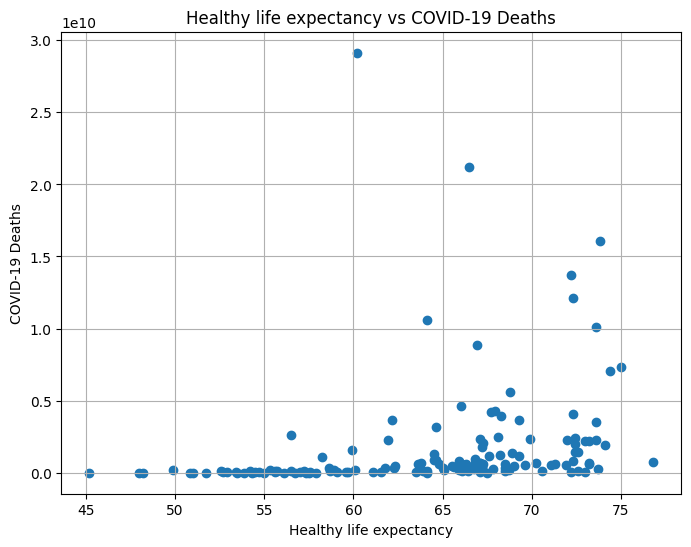

In [22]:
# plotting scatter plot in this matter
plt.figure(figsize=(8, 6))
plt.scatter(df['Healthy life expectancy'], df['sum_for_each_country'])
plt.title('Healthy life expectancy vs COVID-19 Deaths')
plt.xlabel('Healthy life expectancy')
plt.ylabel('COVID-19 Deaths')
plt.grid(True)
plt.show()

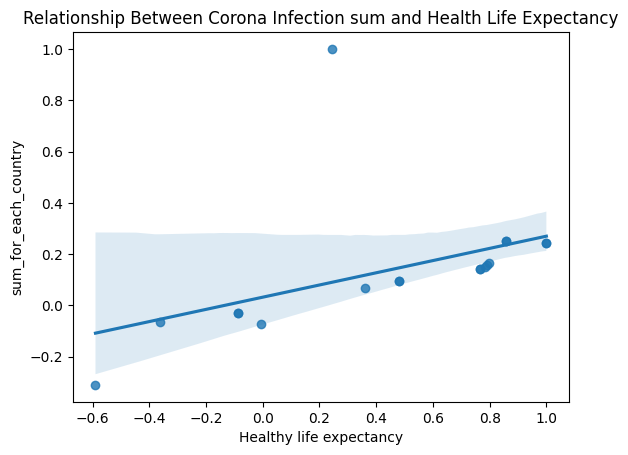

In [23]:

ax= sns.regplot(x="Healthy life expectancy", y="sum_for_each_country", data=corr_df)

ax.set_title("Relationship Between Corona Infection sum and Health Life Expectancy")

plt.show()

#### Plotting sum of deaths vs Ladder Score

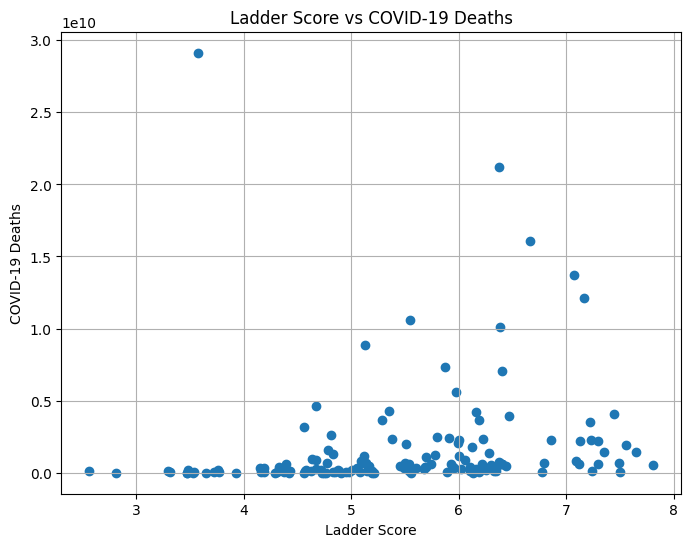

In [24]:
# plotting scatter plot in this matter
plt.figure(figsize=(8, 6))
plt.scatter(df['Ladder score'], df['sum_for_each_country'])
plt.title('Ladder Score vs COVID-19 Deaths')
plt.xlabel('Ladder Score')
plt.ylabel('COVID-19 Deaths')
plt.grid(True)
plt.show()

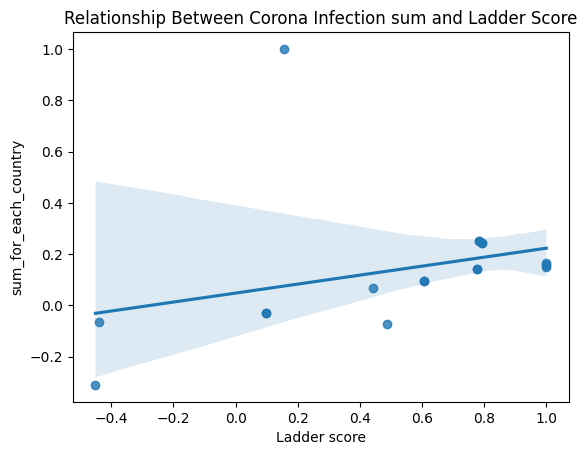

In [25]:

ax= sns.regplot(x="Ladder score", y="sum_for_each_country", data=corr_df)

ax.set_title("Relationship Between Corona Infection sum and Ladder Score")

plt.show()

## 3. Results

### Does the Impact of COVID-19 on Global Death Rates Relate to Varied Levels of Happiness Across Countries?

Now we can go back to our initial question which was the above question and we can discuss it in more details.

Upon diving into the data from two different sources, a fascinating trend emerged. It appears that individuals living in more affluent countries have a higher likelihood of contracting the Coronavirus compared to those residing in less economically developed nations. This discovery hints at a potential link between a country's wealth and the number of people affected by the virus. It's intriguing to see that places with more resources and advancements might have more cases of COVID-19. This finding sparks curiosity about the underlying reasons behind this discrepancy in infection rates between wealthier and less affluent regions. It prompts us to consider how factors like access to healthcare, social structures, and other aspects tied to a country's level of development might influence the spread of the virus among its population.





## 4. Discussion

#### 4.1 Summary of Findings:
##### Affluence and Infection Rates: 
Highlight the observed trend of higher COVID-19 cases in more economically developed countries compared to less affluent nations.
##### Implications of Wealth: 
Emphasize the surprising correlation between wealth and infection rates, which challenges conventional assumptions about disease spread.

#### 4.2 Possible Explanations:
##### Healthcare Access: 
 Advanced healthcare systems in affluent nations might lead to heightened testing, diagnosis, and reporting, potentially inflating infection rate statistics.
##### Social Structures and Behaviors: 
Dense urban living, extensive travel, and societal behaviors in wealthier societies could facilitate virus transmission.
##### Testing and Reporting Disparities: 
Discrepancies in testing availability and reporting standards between richer and poorer countries may skew infection rate comparisons.

#### 4.3 Considerations and Limitations:
##### Data Quality and Variability: 
Acknowledging limitations related to data accuracy, completeness, and consistency across diverse countries is crucial.
##### Multifactorial Nature:
Economic status alone may not fully explain infection rates; various factors like population density, governance, and cultural norms might contribute significantly.

#### 4.4 Future Research Directions:
##### In-depth Analysis: 
Further studies are needed to unravel the specific factors underlying the observed trend.
##### Focused Analyses: 
Comparative studies targeting specific regions or countries could offer nuanced insights into the relationship between wealth and COVID-19 spread.
##### Policy Implications: 
Understanding this relationship could influence long-term public health strategies and policy-making.

### 4.5 Conclusion:
The unexpected correlation between a country's wealth and COVID-19 infection rates emphasizes the complexity of disease spread dynamics. It underscores the necessity for comprehensive research to unravel the multifaceted influences shaping the prevalence of the virus across different socio-economic contexts.
